<a href="https://colab.research.google.com/github/Kawarjeet/Stock-Price-Prediction-using-Stacked-LSTM/blob/main/stock_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas_datareader as pdr

In [21]:
df = pdr.get_data_tiingo('AAPL', api_key= '2ad311bb16ceffb054b881dfb2034c11b3609ad1')

In [35]:
df.to_csv('AAPL.csv')
df = df.astype('str')

In [26]:
df.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2017-01-23 00:00:00+00:00  120.08  120.81  ...      0.0          1.0
       2017-01-24 00:00:00+00:00  119.97  120.10  ...      0.0          1.0
       2017-01-25 00:00:00+00:00  121.88  122.10  ...      0.0          1.0
       2017-01-26 00:00:00+00:00  121.94  122.44  ...      0.0          1.0
       2017-01-27 00:00:00+00:00  121.95  122.35  ...      0.0          1.0

[5 rows x 12 columns]

In [23]:
import pandas as pd

In [38]:
df1 = df.reset_index()['close']

In [39]:
len(df1)

1258

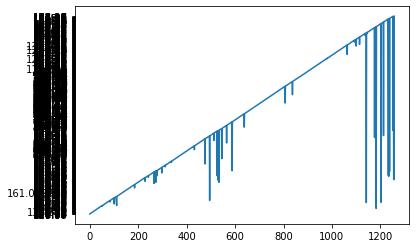

In [40]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [41]:
import numpy as np

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [46]:
print(df1)

[[0.03316218]
 [0.03288666]
 [0.03767063]
 ...
 [0.16588604]
 [0.15769568]
 [0.14875391]]


In [47]:
from sklearn.model_selection import train_test_split
training_data, test_data= train_test_split(df1, test_size=0.35, random_state=42)